In [ ]:
"""
Titulo: Actividad 6 "Redes neuronales"
Nombre: Angie Sofia Hernández Tristán
Matricula: 2008178
Hora clase: N1, LMV
"""

In [1]:
#1. Cargar librerias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#2. Cargar datos.
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#3. Preprocesamiento de datos.
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
#4. Seleccion y entrenamiento del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 62s 32ms/step - loss: 0.1458 - accuracy: 0.9546 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0320 - val_accuracy: 0.9908


313/313 [==============================] - 6s 20ms/step - loss: 0.0320 - accuracy: 0.9908

Exactitud en el conjunto de prueba: 0.9908000230789185
1/1 [==============================] - 1s 544ms/step


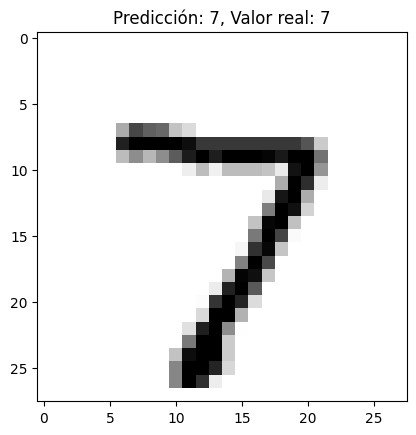

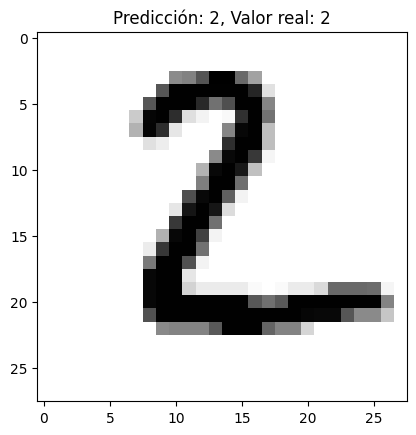

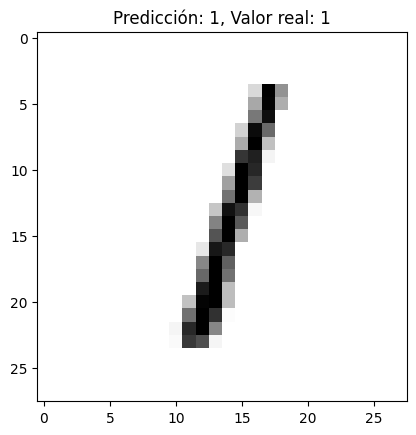

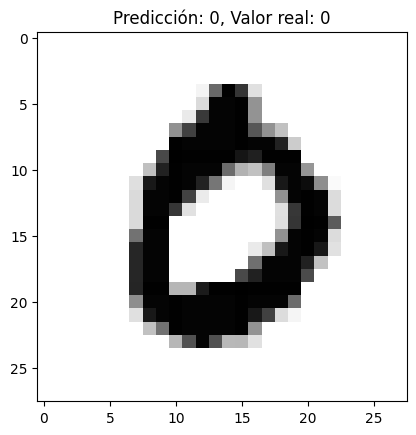

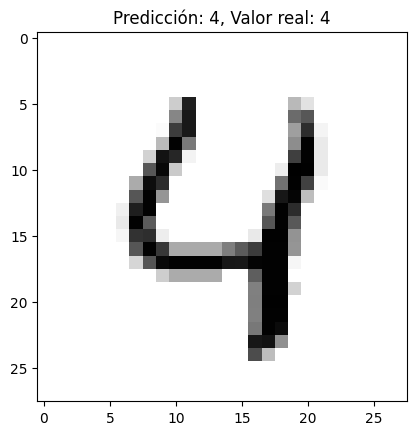

In [5]:
#5. Prueba del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nExactitud en el conjunto de prueba: {test_acc}')

predictions = model.predict(test_images[:5])

for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicción: {np.argmax(predictions[i])}, Valor real: {test_labels[i]}')
    plt.show()

** ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? **

Use 5 epocas de diferencia con las de la actividad anterior

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**
Si, pues las redes neuronales convolucionales tienen un mayor grado de rendimiento cuando se trata de analizar tareas de vision por computadora como la clasificacion de imágenes. Y en la actividad anterior, con 10 epocasla exactitud era del 97% aproximadamente, por otra parte, aqui con solo 5 epocas, l exactitud es 99%